In [58]:
%matplotlib notebook
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [59]:
# Import ride data into pandas from CSV

ride_df = pd.read_csv("/Users/arjun.maniyar/Desktop/Git_MoveTo/02-Homework/05-Matplotlib/Instructions/Pyber/raw_data/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [60]:
# Import city data into pandas from CSV

city_df = pd.read_csv("/Users/arjun.maniyar/Desktop/Git_MoveTo/02-Homework/05-Matplotlib/Instructions/Pyber/raw_data/city_data.csv")
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [61]:
tot_drivers_city = city_df["driver_count"]
tot_drivers_city.head()

0    63
1     8
2    12
3    34
4    52
Name: driver_count, dtype: int64

In [62]:
# City = ride_df["city"]
# Date = ride_df["date"]
# Fare = ride_df["fare"]
# Ride_ID = ride_df["ride_id"]
# driver_count = city
merged_df = pd.merge(ride_df, city_df, on="city")
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [63]:
# city_group = ride_df.groupby('city')

# avg_fares = city_group['fare'].mean()

# avg_fares.head()
#Total Rides by City Type
city_group = merged_df.groupby(['type','city'])
tot_rides_city = city_group['ride_id'].count()

#urban
urban_id_count = "Urban"
just_urban_count  = tot_rides_city.loc[urban_id_count]

#rural
rural_id_count = "Rural"
just_rural_count  = tot_rides_city.loc[rural_id_count]

#Suburban
sub_id_count = "Suburban"
just_sub_count  = tot_rides_city.loc[sub_id_count]
just_sub_count.head()


city
Anitamouth       9
Campbellport    15
Carrollbury     10
Clarkstad       12
Conwaymouth     11
Name: ride_id, dtype: int64

In [64]:
# city_group = merged_df.groupby(['type','city'])
# tot_city_rides = city_group['ride_id'].count()

In [65]:

#urban
urban_id_count = "Urban"
just_urban_count  = tot_rides_city.loc[urban_id_count]

#rural
rural_id_count = "Rural"
just_rural_count  = tot_rides_city.loc[rural_id_count]

#Suburban
sub_id_count = "Suburban"
just_sub_count  = tot_rides_city.loc[sub_id_count]
just_sub_count.head()

city
Anitamouth       9
Campbellport    15
Carrollbury     10
Clarkstad       12
Conwaymouth     11
Name: ride_id, dtype: int64

In [66]:
#Average Fare ($) Per City
urban_data = merged_df.groupby(['type','city'])
avg_fare = urban_data['fare'].mean()

#urban
urban_id_avg = "Urban"
just_urban_avg = avg_fare.loc[urban_id_avg]

#rural
rural_id_avg = "Rural"
just_rural_avg = avg_fare.loc[rural_id_avg]
just_rural_avg.head()

#rural
sub_id_avg = "Suburban"
just_sub_avg = avg_fare.loc[sub_id_avg]
just_sub_avg.head()

city
Anitamouth      37.315556
Campbellport    33.711333
Carrollbury     36.606000
Clarkstad       31.051667
Conwaymouth     34.591818
Name: fare, dtype: float64

<IPython.core.display.Javascript object>


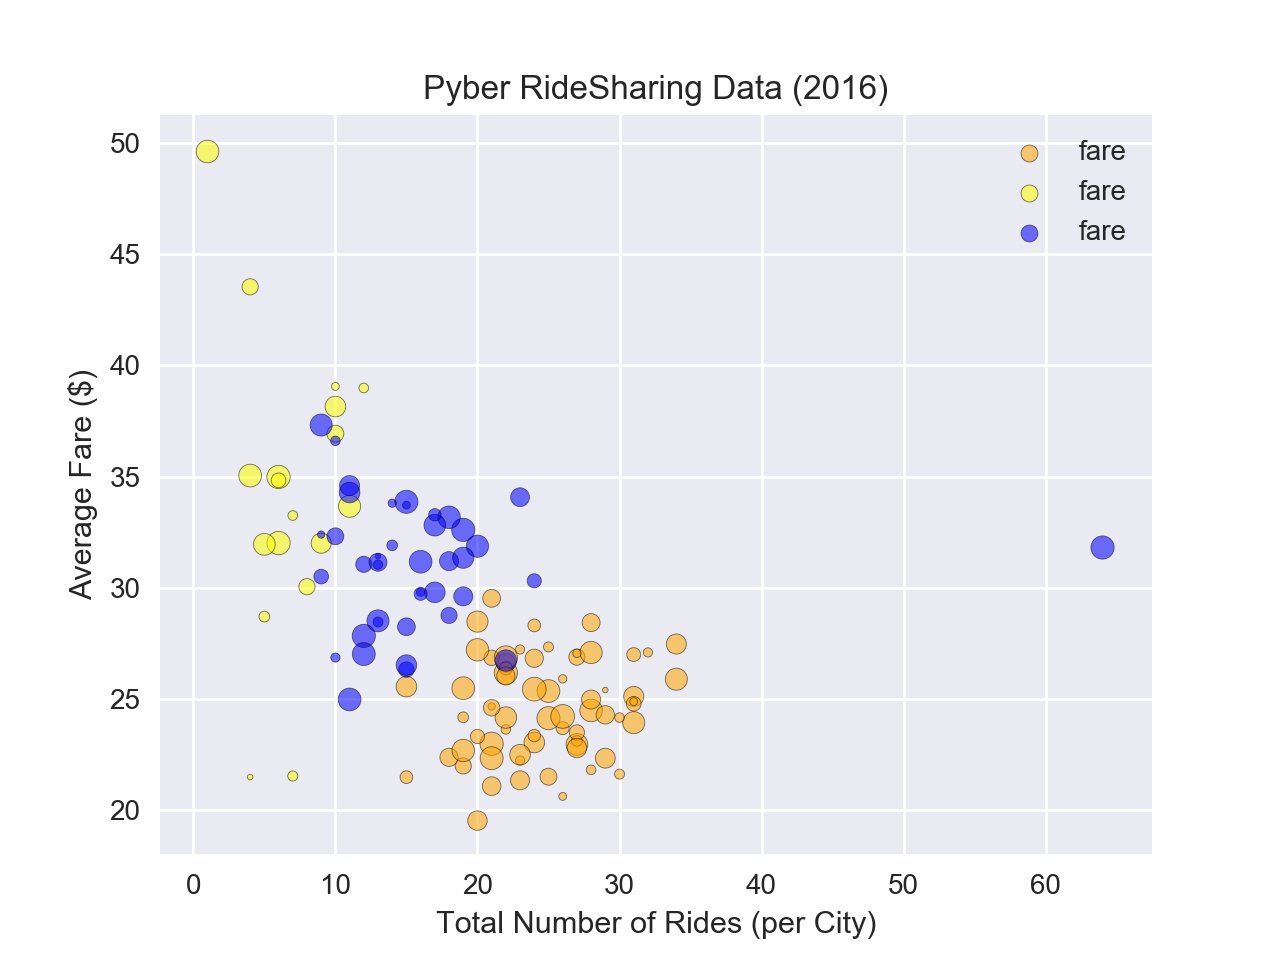

In [75]:
# type_merged = merged_df.groupby('type')

# plt.legend(loc="best")
# plt.scatter(tot_rides_city, avg_fares,  s=tot_drivers_city)
# sns.set()
# plt.show()

# type_urban = merged_df.loc[(merged_df["type"] = ]
plt.title("Pyber RideSharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# # colors = ["orange", "blue", "yellow"]
plt.scatter(just_urban_count, just_urban_avg, marker="o", facecolors="orange", edgecolors="black", s=tot_drivers_city, alpha=0.55)
plt.scatter(just_rural_count, just_rural_avg, marker="o", facecolors="yellow", edgecolors="black", s=tot_drivers_city, alpha=0.55)
plt.scatter(just_sub_count, just_sub_avg, marker="o", facecolors="blue", edgecolors="black", s=tot_drivers_city, alpha=0.55)
plt.legend(loc="best")


In [9]:
citygrp = city_df.groupby('type')

tot_drivers = citygrp['driver_count'].sum()

tot_drivers

type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

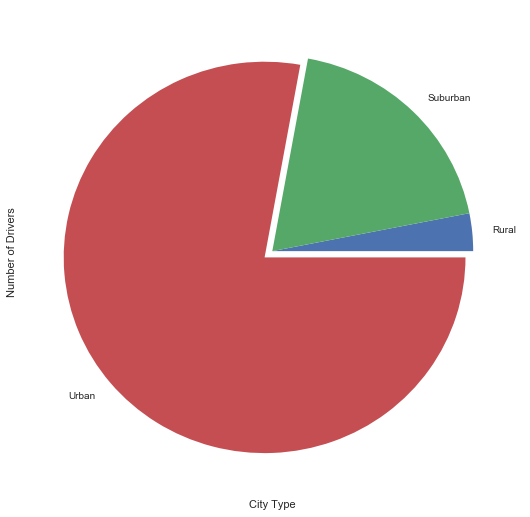

In [15]:
explode =(0,0,0.05)
drivers_chart = tot_drivers.plot(kind='pie', explode = explode, figsize=(9,9))

# Set the xlabel and ylabel using class methods
drivers_chart.set_xlabel("City Type")
drivers_chart.set_ylabel("Number of Drivers")


plt.show()

In [11]:
type_merged = merged_df.groupby('type')

tot_fare = type_merged['fare'].sum()

tot_fare

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

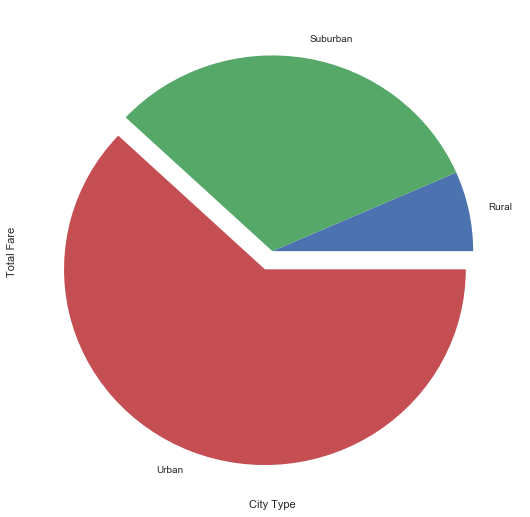

In [12]:
fare_chart = tot_fare.plot(kind='pie', explode = explode, figsize=(9,9))

# Set the xlabel and ylabel using class methods
fare_chart.set_xlabel("City Type")
fare_chart.set_ylabel("Total Fare")


plt.show()

In [13]:
tot_rides = type_merged['ride_id'].count()

tot_rides

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

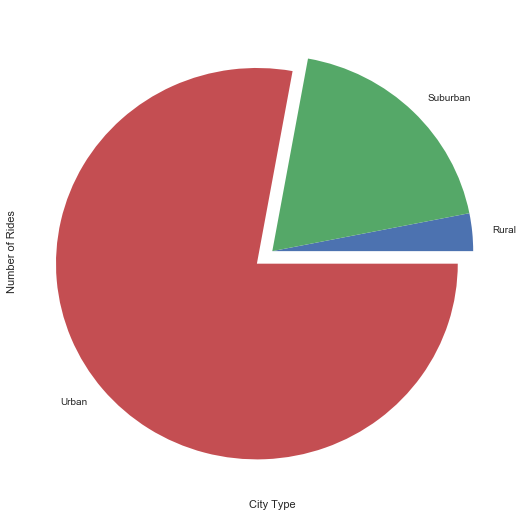

In [14]:
rides_chart = tot_drivers.plot(kind='pie', explode = explode, figsize=(9,9))

# Set the xlabel and ylabel using class methods
rides_chart.set_xlabel("City Type")
rides_chart.set_ylabel("Number of Rides")


plt.show()